# Аналитический анализ финансовой успешности развлекательного приложения Procrastinate Pro+

## Описание проекта:

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

**Задача — разобраться в причинах и помочь компании выйти в плюс.**

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

В проекте предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**В нашем распоряжении три датасета.** 

Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.


**Структура `visits_info_short.csv`:**

- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

**Структура orders_info_short.csv:**
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

**Структура costs_info_short.csv:**
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

## План по выполнению проекта:

Шаг 1. Загрузить данные и подготовить их к анализу.

Шаг 2. Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Шаг 3. Исследовательский анализ данных.

Шаг 4. Маркетинг.

Шаг 5. Оценка окупаемости рекламы.

Шаг 6. Рекомендации рекламных каналов.

Шаг 7. Общий вывод.

## Выполнение проекта:


### Шаг 1. Загрузить данные и подготовить их к анализу.

В первую очеред загрузим необходимые библиотеки для работы.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as ticker
from scipy import stats as st
from datetime import datetime, timedelta

Загрузим данные:

In [2]:
try:
    visits = pd.read_csv('visits_info_short.csv')
except: 
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    
try:
    orders = pd.read_csv('orders_info_short.csv')
except: 
    orders = pd.read_csv('/datasets/orders_info_short.csv')    
    
try:
    costs = pd.read_csv('costs_info_short.csv')
except: 
    costs = pd.read_csv('/datasets/costs_info_short.csv')

#### 1.1 Размерность, просмотр начальных и конечных записей наборов, информация по типам

In [3]:
tabs={'visits': visits,'orders':orders, ' costs': costs}
for key in tabs:
    print('\033[1m' + f'Первые 5 строк таблицы {key}'+'\033[0m')
    display(tabs[key].head(5))
    print('\033[1m' + f'Последние 5 строк таблицы {key}'+'\033[0m')
    display(tabs[key].tail(5))
    print('\033[1m' + f'Информация по столбцам таблицы {key}'+'\033[0m')
    display(tabs[key].info())
    


Первые 5 строк таблицы visits


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Последние 5 строк таблицы visits


,User Id,Region,Device,Channel,Session Start,Session End
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55
309900,109329042535,Germany,PC,lambdaMediaAds,2019-10-31 14:17:43,2019-10-31 15:17:04


Информация по столбцам таблицы visits
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 8.3+ MB


None

Первые 5 строк таблицы orders


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Последние 5 строк таблицы orders


,User Id,Event Dt,Revenue
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99
40211,329994900775,2019-10-31 13:29:06,4.99


Информация по столбцам таблицы orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 785.5+ KB


None

Первые 5 строк таблицы  costs


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Последние 5 строк таблицы  costs


,dt,Channel,costs
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8
1799,2019-10-27,lambdaMediaAds,12.0


Информация по столбцам таблицы  costs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 28.2+ KB


None

**Вывод:** 
- в таблице `visits` пропусков нет. Столбцы содержащие даты (`Session Start`, `Session End` ) имеют неправильный тип. Названия заголовков требуют коррекции: перевод в нижний регистр и замена пробела на символ нижнего подчеркивания.
- в таблице `orders` пропусков нет. Столбец содержащий дату (`Event Dt`) имеет неправильный тип. Названия заголовков требуют коррекции: перевод в нижний регистр и замена пробела на символ нижнего подчеркивания.
- в таблице `costs` пропусков нет. Столбец содержащий дату (` dt `) имеет неправильный тип. Названия заголовков требуют коррекции: перевод в нижний регистр.

####  Вывод по шагу 1.1.
Требуется замена формата у столбцов с датой и изменение названий заголовков.

In [4]:
visits.columns=visits.columns.str.lower().str.replace(' ', '_') #замена регистра и пробела

In [5]:
orders.columns=orders.columns.str.lower().str.replace(' ', '_') #замена регистра и пробела

In [6]:
costs.columns=costs.columns.str.lower().str.replace(' ', '_') #замена регистра и пробела

In [7]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date



проверка замен имен и формата

In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 10.6+ MB


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.5 KB


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 28.2+ KB


#### 1.2 Проверка данных на дубликаты.

In [11]:
visits.duplicated().sum()

0

In [12]:
orders.duplicated().sum()

0

In [13]:
costs.duplicated().sum()

0

####  Вывод по шагу 1.2. 
Полных дубликатов в данных нет

## Шаг 2. Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.


Это функции для вычисления значений метрик:
- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:
- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [14]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

   
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles



In [15]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [16]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [17]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [18]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [19]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [20]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [21]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Шаг 3. Исследовательский анализ данных.

План работы: 

3.1 Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

3.2 Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

3.3 Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

3.4 Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построем таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

### 3.1 Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [22]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs )
profiles.head(5) 




,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [23]:
# получаем минимальную дату привлечения
dt_min = profiles['dt'].min()
dt_min

datetime.date(2019, 5, 1)

In [24]:
# получаем максимальную дату привлечения
dt_max = profiles['dt'].max()
dt_max

datetime.date(2019, 10, 27)

**Вывод:** Посетители привлекались с 1.05.19 по 27.10.2019. Что соответствует исходным данным

### 3.2  Распределение пользователей по странам.
Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [25]:


# распределение по странам 
profiles_all_region = profiles.groupby('region').agg({'user_id': 'nunique'}).sort_values('user_id', ascending = False)

# распределение по странам, платящих пользователей 
profiles_payer_region = (profiles.query('payer == True').groupby('region').agg({'user_id': 'nunique'})
                         .sort_values('user_id', ascending = False))
profiles_payer_region.rename(columns = ({'user_id':'new_user_id'}), inplace = True)

# соберем сводную таблицу
profiles_region=profiles_all_region.merge(profiles_payer_region, on = 'region')

#Вычислим долю платящих пользователей для каждого региона
profiles_region['share_paying'] = round(profiles_region['new_user_id']/profiles_region['user_id']*100,2)
profiles_region.sort_values('share_paying', ascending = False)

,user_id,new_user_id,share_paying
region,,,
United States,100002,6902,6.90
Germany,14981,616,4.11
UK,17575,700,3.98
France,17450,663,3.80


### Вывод по шагу 3.2

Пользователи приложения живут в 4х странах. Больше всего платящих покупателей находятся в `United States`

### 3.3 Распределение пользователей по устройствам.
Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [26]:
# распределение по устройствам 
profiles_all_device = profiles.groupby('device').agg({'user_id': 'nunique'}).sort_values('user_id', ascending = False)

# распределение по устройствам, платящих пользователей 
profiles_payer_device = (profiles.query('payer == True').groupby('device').agg({'user_id': 'nunique'})
                         .sort_values('user_id', ascending = False))
profiles_payer_device.rename(columns = ({'user_id':'new_user_id'}), inplace = True)

# Соберем сводную таблицу
profiles_device=profiles_all_device.merge(profiles_payer_device, on = 'device')

# Вычислим долю платящих пользователей для каждого устройства
profiles_device['share_paying'] = round(profiles_device['new_user_id']/profiles_device['user_id']*100,2)
profiles_device.sort_values('share_paying', ascending = False)

,user_id,new_user_id,share_paying
device,,,
Mac,30042,1912,6.36
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05


### Вывод по шагу 3.3

Используются 4 устройства. Больше всего доля платящих пользователей у `Mac`. Хотя самое большое количество зарегистрированных пользователей (платящих и не платящих) у `iPhone`

### 3.4 Распределение пользователей по рекламным источникам.
Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построем таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [27]:
# распределение по рекламным каналам
profiles_all_channel = profiles.groupby('channel').agg({'user_id': 'nunique'}).sort_values('user_id', ascending = False)


In [28]:
# распределение по устройствам, платящих пользователей 
profiles_payer_channel = (profiles.query('payer == True').groupby('channel').agg({'user_id': 'nunique'})
                         .sort_values('user_id', ascending = False))
profiles_payer_channel.rename(columns = ({'user_id':'new_user_id'}), inplace = True)


In [29]:
#Соберем сводную таблицу
profiles_channel=profiles_all_channel.merge(profiles_payer_channel, on = 'channel')


In [30]:
# Вычислим долю платящих пользователей для каждого канала
profiles_channel['share_paying'] = round(profiles_channel['new_user_id']/profiles_channel['user_id']*100,2)
profiles_channel.sort_values('share_paying', ascending = False)

,user_id,new_user_id,share_paying
channel,,,
FaceBoom,29144,3557,12.20
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
WahooNetBanner,8553,453,5.30
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57
LeapBob,8553,262,3.06


### Вывод по шагу 3.4

Используются 10 каналов привлечения и органичесский трафик. Больше всего доля платящих пользователей у  канала `FaceBoom`. Органический трафик конвертируется в покупателей хуже всего, хотя количество привлеченных пользователей у него максимально. Возможно на это стоит обратить пристальное внимание, почему люди пришедшие сами не совершают покупку? 

## Шаг 4. Маркетинг.
План работы:

4.1 Посчитаем общую сумму расходов на маркетинг.

4.2 Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

4.3 Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Отразим это на одном графике.

4.4 Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем для этого  профили пользователей.

### 4.1 Посчитаем общую сумму расходов на маркетинг.

In [31]:
costs_all = costs['costs'].sum()
print(f'За все время наблюдений было поотрачено {round(costs_all,2)}')

За все время наблюдений было поотрачено 105497.3


### 4.2 Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [32]:
costs_all_channel = costs.groupby('channel').agg({'costs': 'sum'}).sort_values('costs', ascending = False)
costs_all_channel

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


In [33]:
#расчитаем долю на каждый рекламный источник
costs_all_channel['share_paying'] = round(costs_all_channel['costs']/costs_all*100,2)
costs_all_channel.sort_values('share_paying', ascending = False)

,costs,share_paying
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


### Выводы по шагам 4.1 и 4.2
За все время наблюдейний было потрачено 105497.3 у.е. Траты, относительн рекламных источников распределены неравномерно. Больше всего вложено денег в `TipTop` - 54751.30 у.е. это  большая часть общего бюджета (~ 52%)  и `FaceBoom `- 32445.60 у.е. это более 30%. Требуется проверить, насколько были оправданы эти вложения. Остальные рекламные источники составляют небольшую часть затрат.

### 4.3 Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Отразим это на одном графике.

In [34]:
# выделим в таблице расходов <costs> отдельно столбец с неделями и месяцами для анализа.
costs['month']=costs['dt'].astype('datetime64[M]')
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week']=costs['dt'].dt.isocalendar().week

In [35]:
costs.head(10)

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,2019-05-01,18
1,2019-05-02,FaceBoom,78.1,2019-05-01,18
2,2019-05-03,FaceBoom,85.8,2019-05-01,18
3,2019-05-04,FaceBoom,136.4,2019-05-01,18
4,2019-05-05,FaceBoom,122.1,2019-05-01,18
5,2019-05-06,FaceBoom,118.8,2019-05-01,19
6,2019-05-07,FaceBoom,101.2,2019-05-01,19
7,2019-05-08,FaceBoom,100.1,2019-05-01,19
8,2019-05-09,FaceBoom,93.5,2019-05-01,19
9,2019-05-10,FaceBoom,104.5,2019-05-01,19


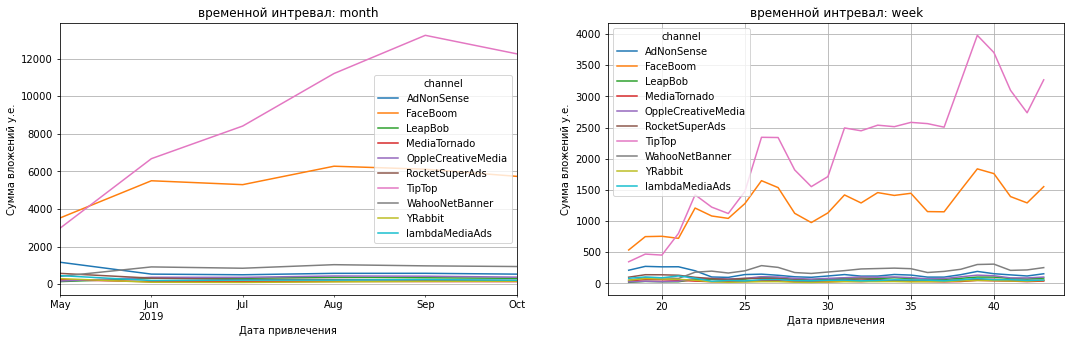

In [36]:
 # строим графики затрат по неделям и месяцам
plt.figure(figsize=(18, 5))

for plot_num, columns in enumerate(['month', 'week']):
   
    costs.pivot_table(
    index=columns, columns='channel', values='costs', aggfunc='sum'
    ).plot(grid=True,  ax=plt.subplot(1, 2, plot_num + 1))
    
    plt.title('временной интревал: {}'.format(columns))
    plt.xlabel('Дата привлечения')
    plt.ylabel('Сумма вложений у.е.')
plt.show() 

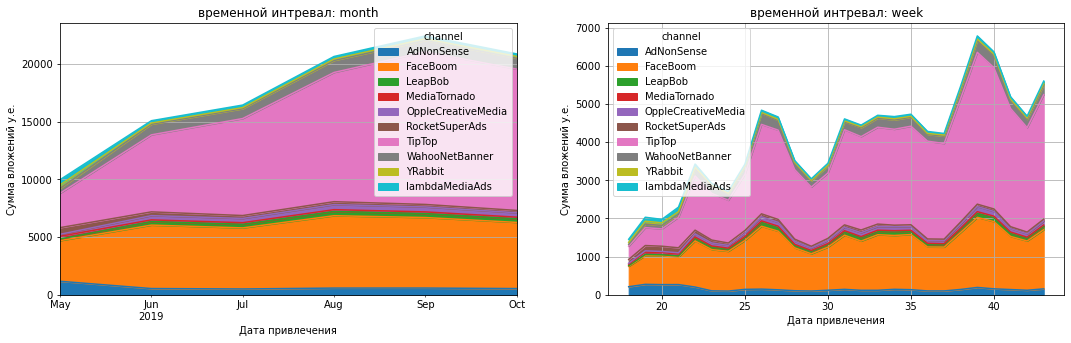

In [37]:
plt.figure(figsize=(18, 5))

for plot_num, columns in enumerate(['month', 'week']):
   
    costs.pivot_table(
    index=columns, columns='channel', values='costs', aggfunc='sum'
    ).plot.area(grid=True,  ax=plt.subplot(1, 2, plot_num + 1))
    
    plt.title('временной интревал: {}'.format(columns))
    plt.xlabel('Дата привлечения')
    plt.ylabel('Сумма вложений у.е.')
plt.show() 

### Вывод по шагу 4.3
В целом затраты у главных каналов `TipTop` и `FaceBoom` росли, причем у фаворита `TipTop` затраты в последний месяц рассматриваемого периода уменьшились. Остальные каналы получали небольшое по суммам финансирование достаточно равномерно. 

Недельный график позволяет сделать вывод, что хоть в целом у фаворитов была тенденция к увеличению финансирования, оплата происходила не равномерно. Возможно это было связано с дополнительными событиями (праздники или мероприятия, под которую давалась реклама). Этот момент требует уточнения у рекламного отдела.

### 4.4 Стоимость привлечения 1 пользователя.
Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем для этого профили пользователей.

При составлении профиля пользователя (пункт 3.1) мы посчитали `acquisition_cost` стоимость привлечения конкретного пользователя. 

In [38]:
profiles.pivot_table(
     columns='channel', values='acquisition_cost', aggfunc='mean').T.sort_values('acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


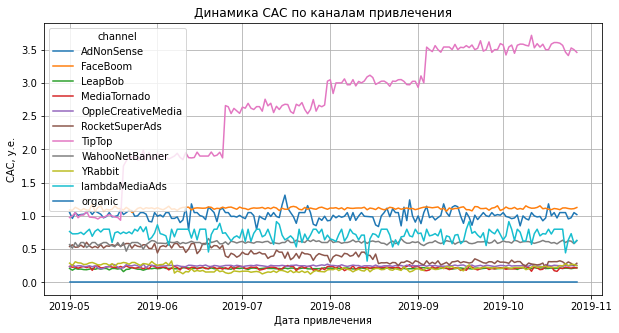

In [39]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, у.е.')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

### Вывод по шагу 4.4
Посчитана средняя стоимость привлечения для каждого рекламного канала. 
Самый дорогой канал `TipTop` - 2.799003  у.е. на одного пользователя

На графике показана динамика изменений во времени. Даже если не обращать внимание на шумы ( а мы строили график по всем значениям дат) видно, что стоимость привлечения пользователя для канала `TipTop` неуклонно растет. А в связи с тем, что расходы на рекламу для этого источника составляли более 50% всего рекламного бюджета, можно сделать предположение, что это один из факторов получения убытков компании.

## Шаг 5. Оценка окупаемости рекламы.

План работы:

Будем использовать графики LTV, ROI и CAC, проанализируем окупаемость рекламы. 
Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

- 5.1 Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.
- 5.2 Проверем конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.
- 5.3 Проанализируем окупаемость рекламы с разбивкой по устройствам. Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- 5.4 Проанализируем окупаемость рекламы с разбивкой по странам. Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- 5.5 Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI.



### 5.1 Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

Установим момент и горизонт анализа данных. Считаем, что на календаре 1 ноября 2019 года, и зададим 2-х недельный горизонт анализа, огласно бизнес плану компании.

In [40]:
observation_date = datetime(2019,11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

Т.к. мы будем оценивать окупаемость платного привлечения, то удалим из данных всех пользователей с органическим трафиком.

In [41]:
profiles= profiles.query('channel != "organic"')


Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

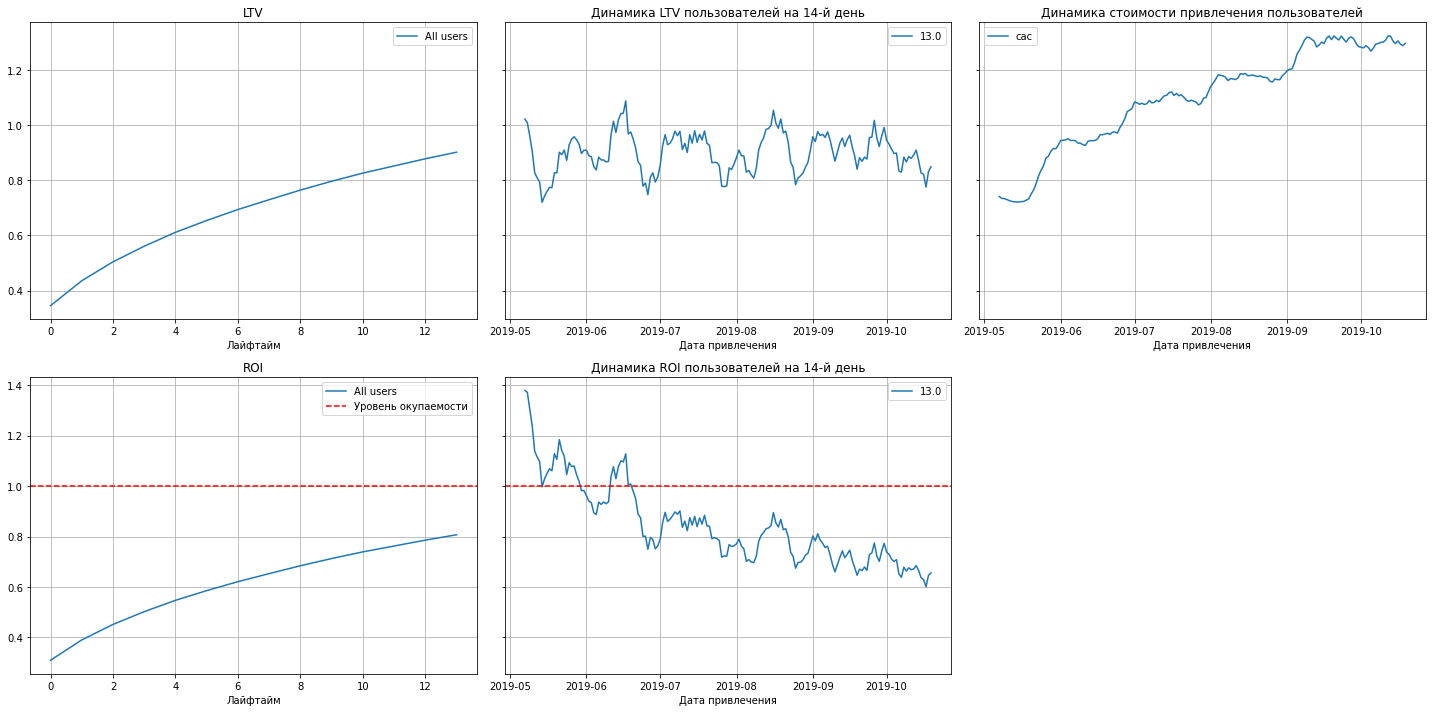

In [42]:
#считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

### Выводы по пункту 5.1

1. Реклама не окупается, даже к концу 2ой недели ROI меньше 1 . Динамика окупаемости стремительно падает. После июля она отрицательна и не выходит  даже "в ноль" вообще.
2. САС растет, причем достаточно сильно. Стоимость привлечения клиента сильно увеличивается. 
3. На На LTV влияет временной фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

### 5.2  Конверсия и удержание.
Проверем конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion().

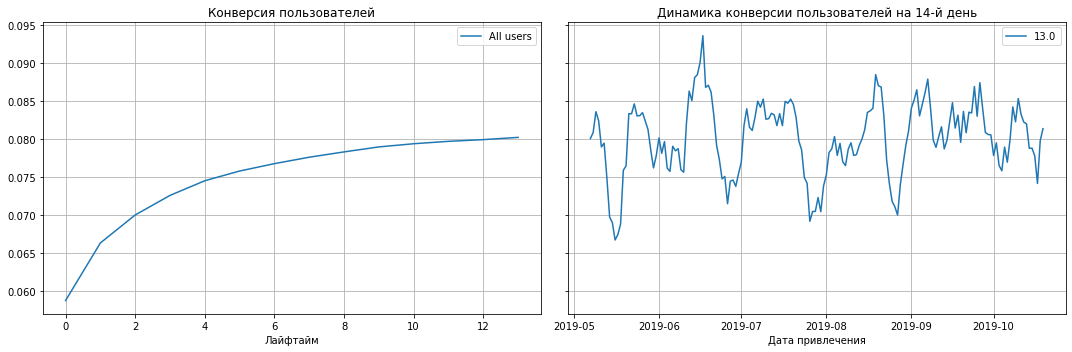

In [43]:
# смотрим общую конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

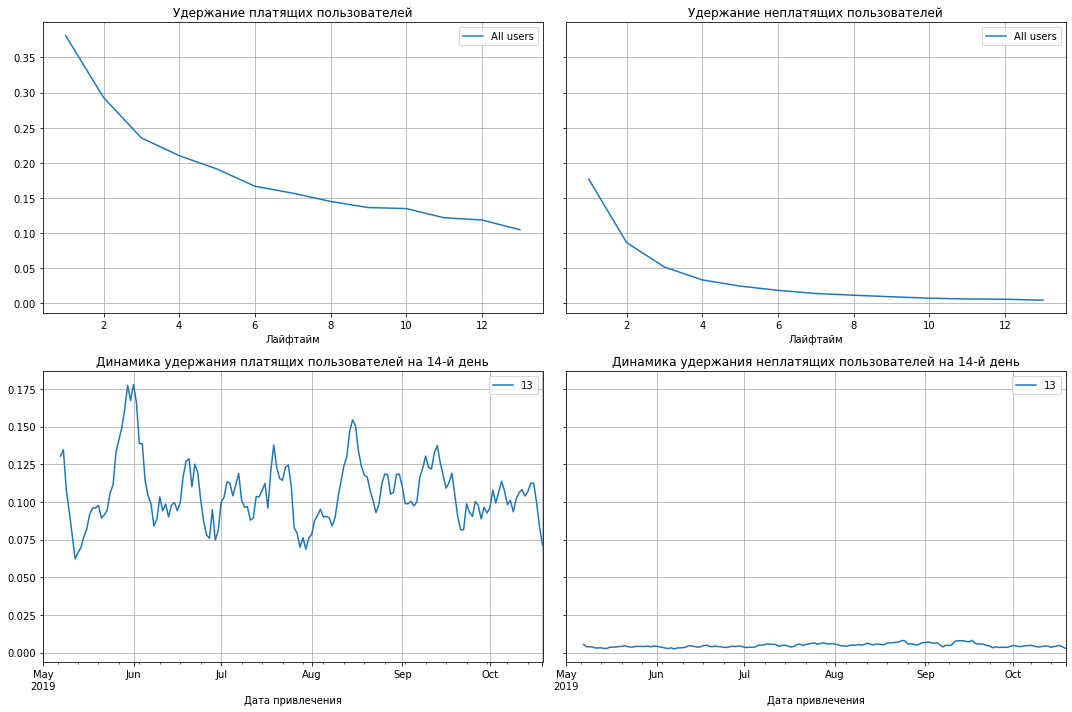

In [44]:
# смотрим удержание 

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=[]
)

plot_retention(retention_grouped, retention_history, horizon_days) 

### Вывод по 5.2
Конверсия вполне стабильна, а вот удержание сильно падает. Возможно следует вернуться к этим показателям и рассмотреть их, включив в анализ страну, рекламный канал и устройство пользователя. Вернемся к этому позже.

### 5.3 Проанализируем окупаемость рекламы с разбивкой по устройствам. 
Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

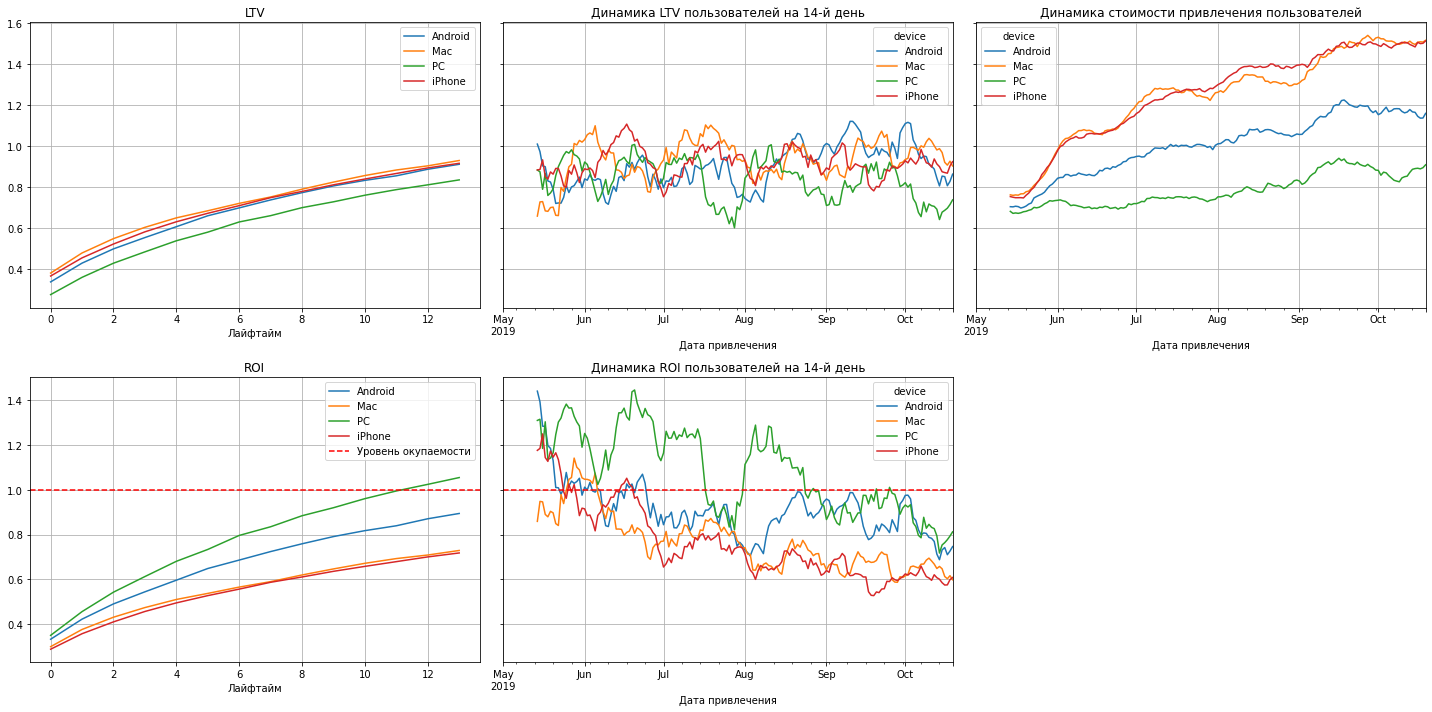

In [45]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

### Выводы по 5.3:
1. Реклама окупается только на PC. В целом окупаеммость снижается.
2. Стоимость привлечения для всех каналов растет достаточно сильно. Больше всего для устройств Aple

### 5.4 Проанализируем окупаемость рекламы с разбивкой по странам. 
Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

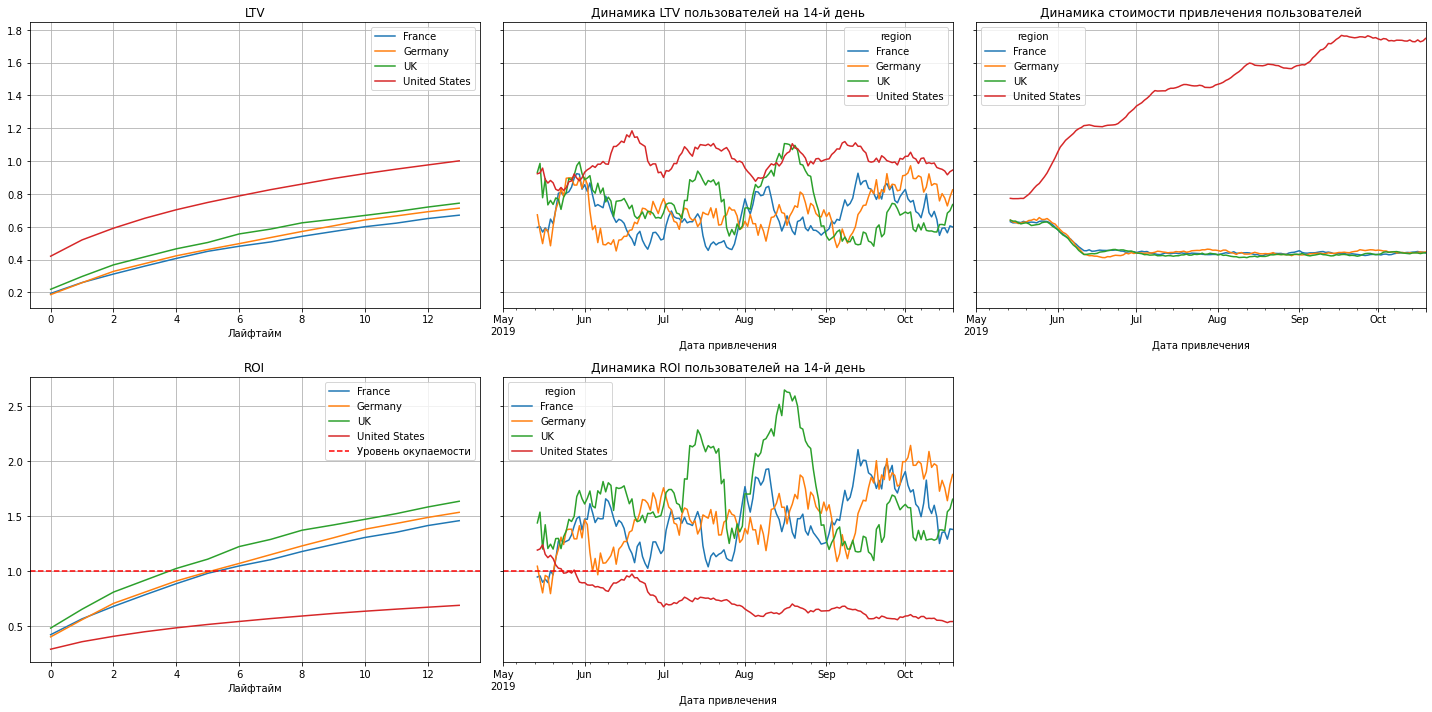

In [46]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

### Вывод по 5.4
Стоимость привлечения пользователей для Соединенных Штатов резко увеличилась после июня 2019 года. Остальные страны остались на прежнем уровне.
Окупаемость для Соединенных Штатов отрицательна и увеличивается в минус. Остальные страны окупают инвестиции. Возможно это главный фактор слива бюджета.

### 5.5 Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. 
Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

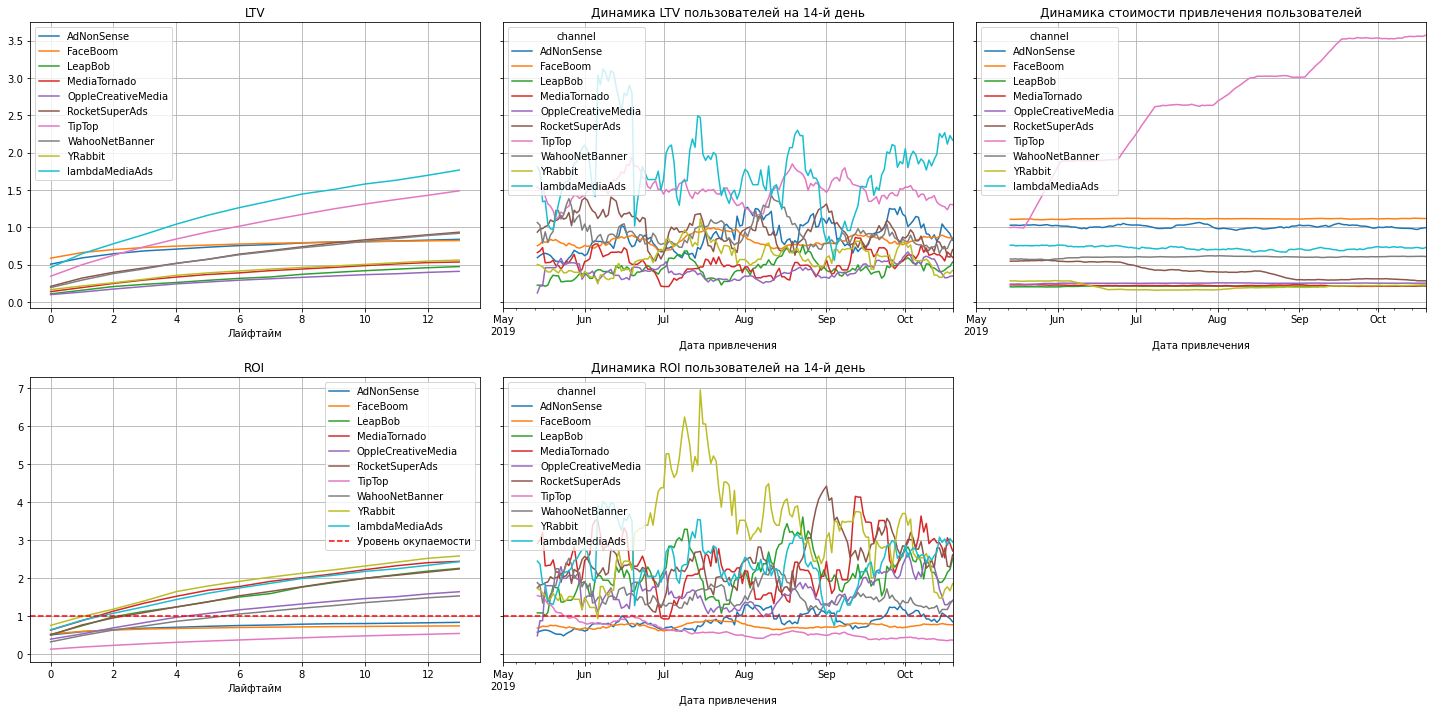

In [47]:
# смотрим окупаемость с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

### Вывод по 5.5
Стоимость привлечения пользователей для канала `Tip Top` резко увеличилась после июля 2019 года. Причем окупаемость для него отрицательна а это главный канал по величине вложений в рекламу (более 50% сумарных инвестиций)

У остальных каналов динамика стоимости привлечения осталась стабильна.

И мы имеем каналы, которые в принципе имеют отрицательную стоимость привлечения. Это `FaceBoom` и `AdNonSense`.  
Причем судя по предыдущим исследованиям `FaceBoom`, это второй по величине канал по стоимости вложений в рекламу (более 30%).
 
*Т.е. получается, что 80% рекламного бюджета сливается в минус!!!*

### 5.5.1 Проверим конверсию и удержание для выявленных проблем. Учтем рекламный канал и страну.

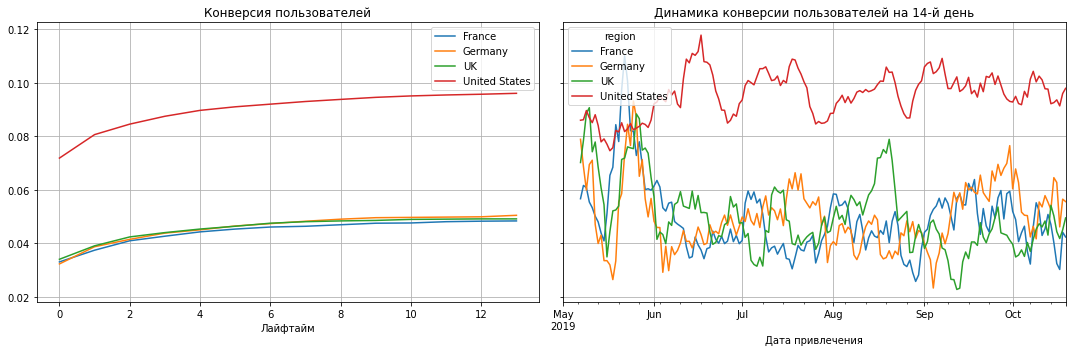

In [48]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

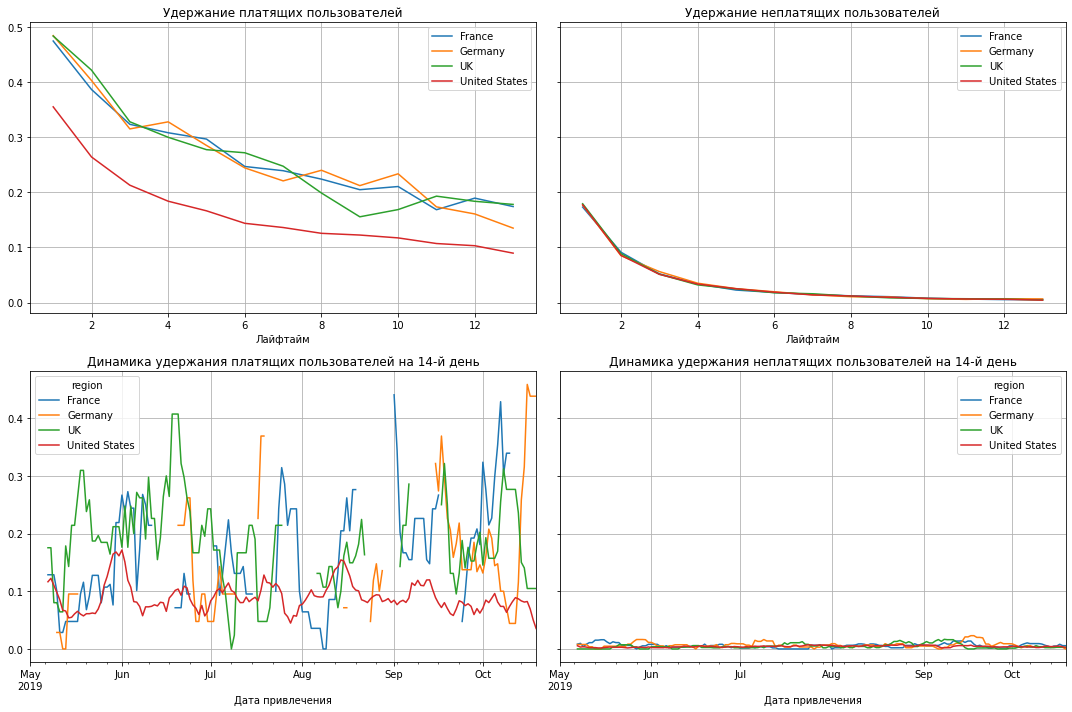

In [49]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

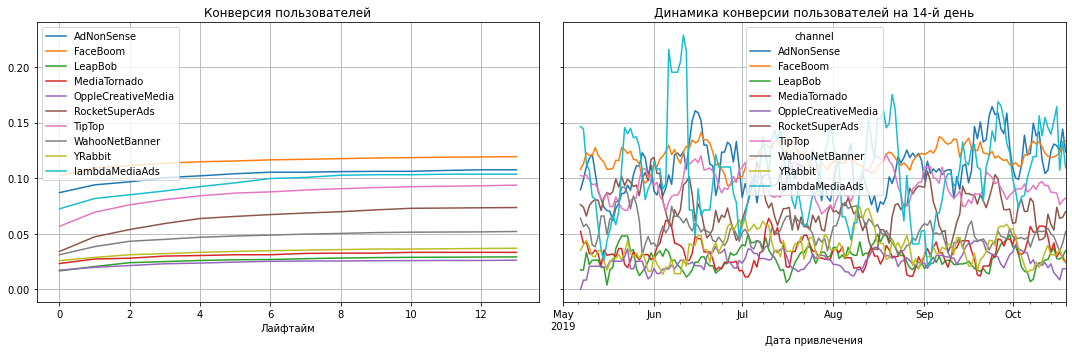

In [50]:
# смотрим конверсию с разбивкой по рекламным каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

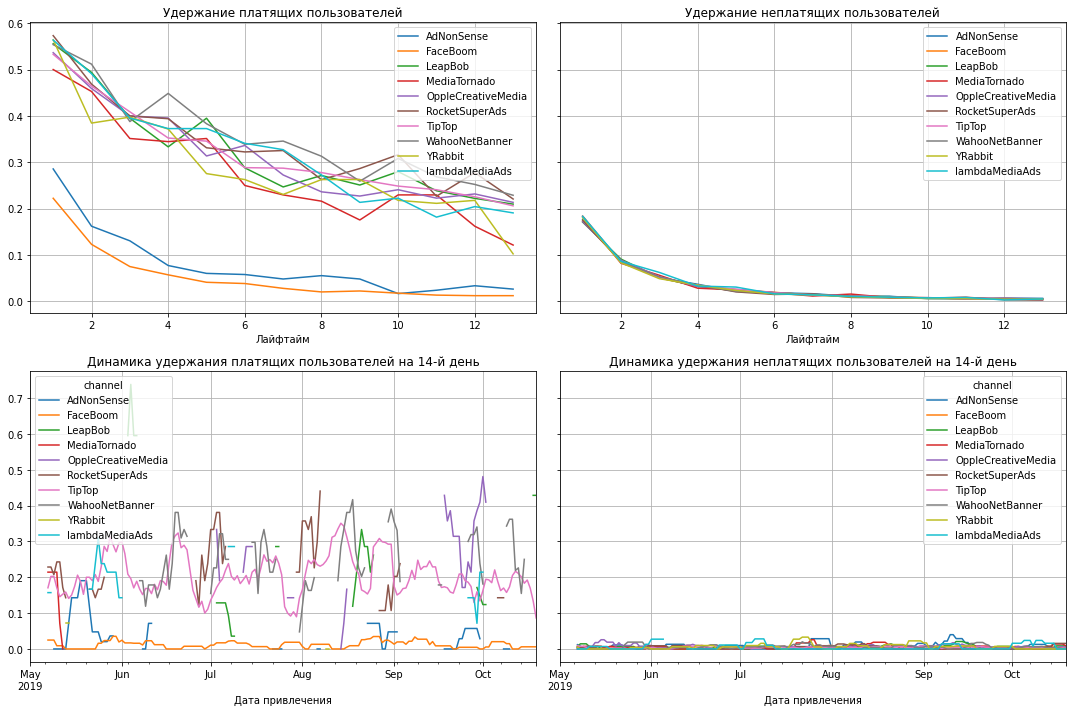

In [51]:
# смотрим удержание с разбивкой по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

### Вывод по 5.5.1
Больших потрясений мы тут не увидели. В целом графики повторяют общий случай.

Но можно отметить, что удержание для `FaceBoom` и `AdNonSense` намного ниже очень быстро стремится к нулю. Видимо с этими каналами стоит отдельно поработать. Возможно другие каналы предлагают что то дополнительно (скидку, бонус или т.п.) что позволяет пользователям оставаться. 

Что касается страны, то в Соединенных Штатах самый низкий уровень удержания и самая высокая стоимость конверсии. Возможно там есть какая то наценка, которая делает стоимость покупки большей, чем в других странах.

### Шаг 5.5.2 Зависимость между каналами и другими параметрами

Попробуем найти зависимость между каналами и странами и девайсами. Возможно  есть рекламные каналы, которые успешны в определенных странах и на некоторых устройствах.

Для этого будем строить тепловые карты, отражающие зависимость привлечения клиента для конкретного канала, по странам и по девайсам

In [52]:
profiles_region = profiles.pivot_table(
     index = 'region', columns='channel', values='acquisition_cost', aggfunc='mean').T


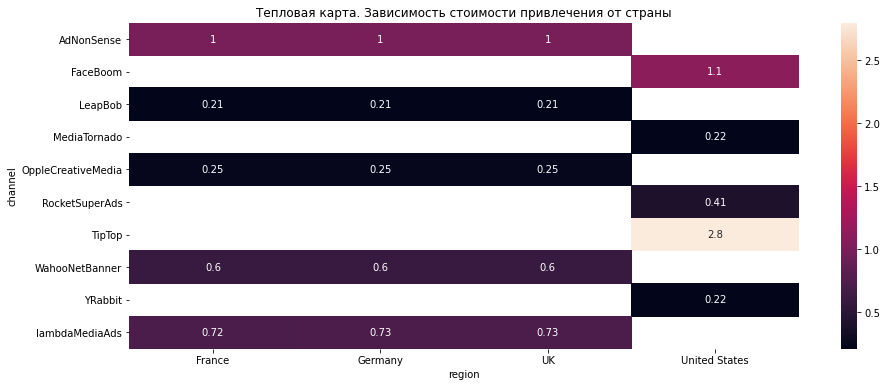

In [53]:

# строим хитмэп

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    profiles_region,
    annot=True,  # включаем подписи
    
)
plt.title('Тепловая карта. Зависимость стоимости привлечения от страны')  # название графика
plt.show()

**Вывод:** 
Выяснилась интересная закономерность. Каналы продвижения различаются по регионам. Часть действует только в Европе, а часть только в USA. Стоимость привлечения в Европе практически не зависит от страны для любого рекламного канала. 
Только у `lambdaMediaAds` стоимость привлечения во Франции чуть ниже, чем в Германии и Украине.
Для рынка Европы самый выгодный по стоимости привлечения получается канал `LeapBob` а для Америки `MediaTornado` и `YRabbit`.  
Нужно провести дополнительный анализ для этих каналов, что бы рекоменовать их отделу маркетинга.

In [54]:
profiles_device = profiles.pivot_table(
     index = 'device', columns='channel', values='acquisition_cost', aggfunc='mean').T

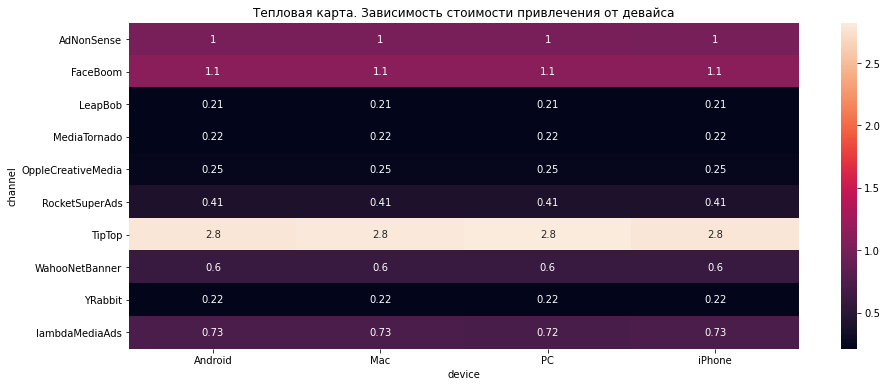

In [55]:
# строим хитмэп

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    profiles_device,
    annot=True,  # включаем подписи
    
)
plt.title('Тепловая карта. Зависимость стоимости привлечения от девайса')  # название графика
plt.show()

**Вывод:** Стоимость привлечения для канала не зависит от устройства. Только в одном случае, у канала `lambdaMediaAds` стоимость для PC чуь меньше.

## Шаг 6. Рекомендации рекламных каналов.

После проведения п. 5.2.2 имеет смысл рассмативать каналы отдельно для рынка Еверопы и Америки, т.к. они действуют независимо друг от друга и нет каналов, которые работают и там и там. 

Для рынка Европы включим в анализ `LeapBob` и `OppleCreativeMedia`. Дkя рынка Америки `YRabbit`	 и `MediaTornado`
каналы выбраны как наиболее дешевые по стоимости привлечения.

Построим данные по этим каналам, что бы рассмотреть возможность рекомендовать их для рекламного бюджета. 



Загрузим costs заново, т.к. при вторичном форматировании даты этого дата фрейма возникают ошибки.

In [56]:
try:
    costs = pd.read_csv('costs_info_short.csv')
except: 
    costs = pd.read_csv('/datasets/costs_info_short.csv')

In [57]:
costs.columns=costs.columns.str.lower().str.replace(' ', '_') #замена регистра и пробела
costs['dt'] = pd.to_datetime(costs['dt']).dt.date


In [58]:
# Выделем в данных только эти каналы для анализа.
channel_add = ['LeapBob', 'OppleCreativeMedia' , 'YRabbit' , 'MediaTornado', 'RocketSuperAds']
costs=costs.query('channel in @channel_add')
visits=visits.query('channel in @channel_add')


In [59]:

# пересчитаем профили 
profiles = get_profiles(visits, orders, costs )

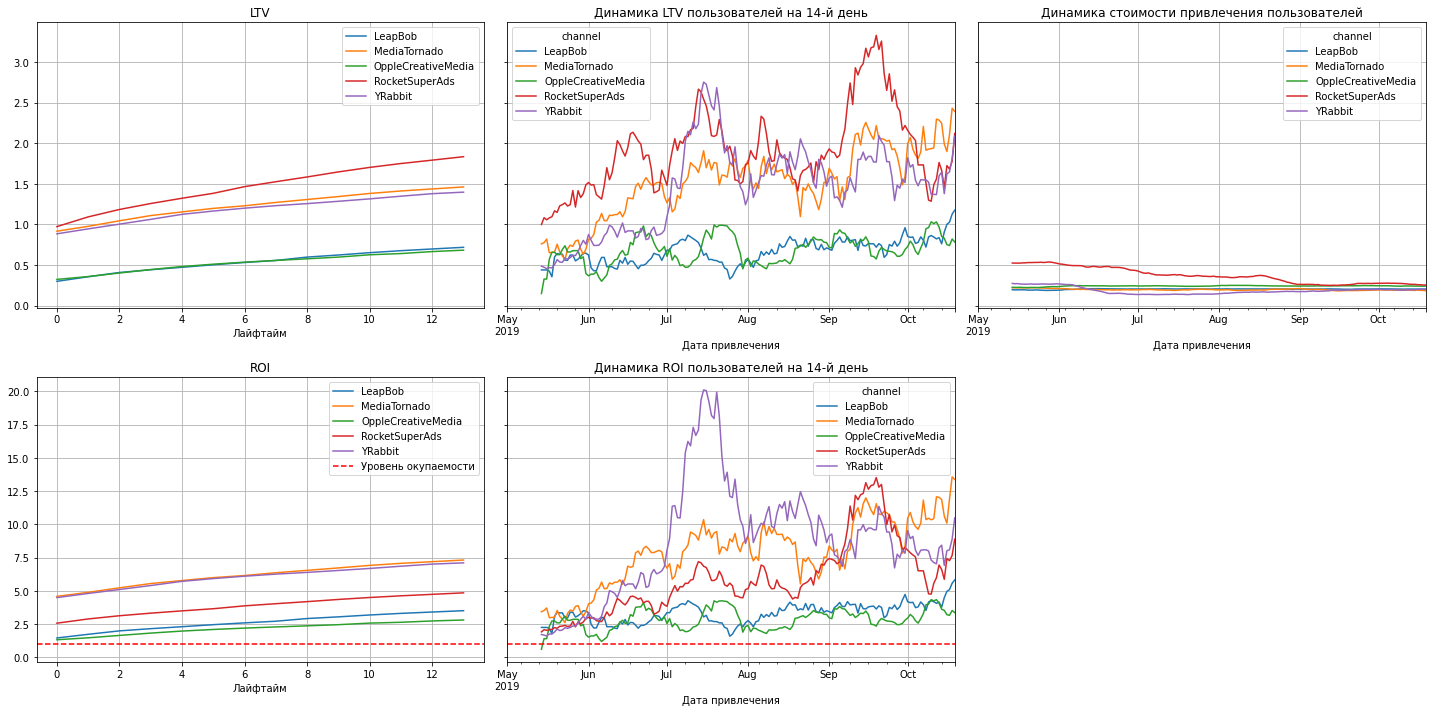

In [60]:
# смотрим окупаемость с разбивкой по выделенным рекламным каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

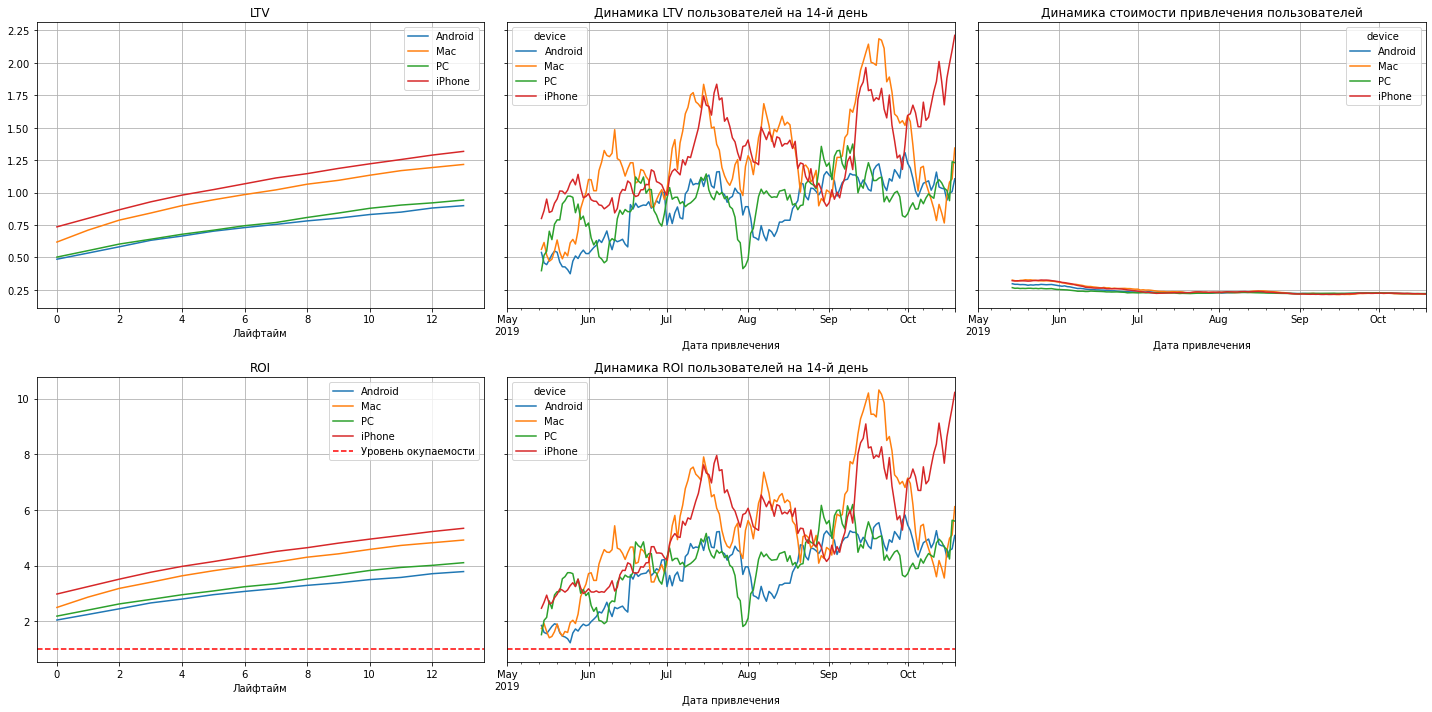

In [61]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

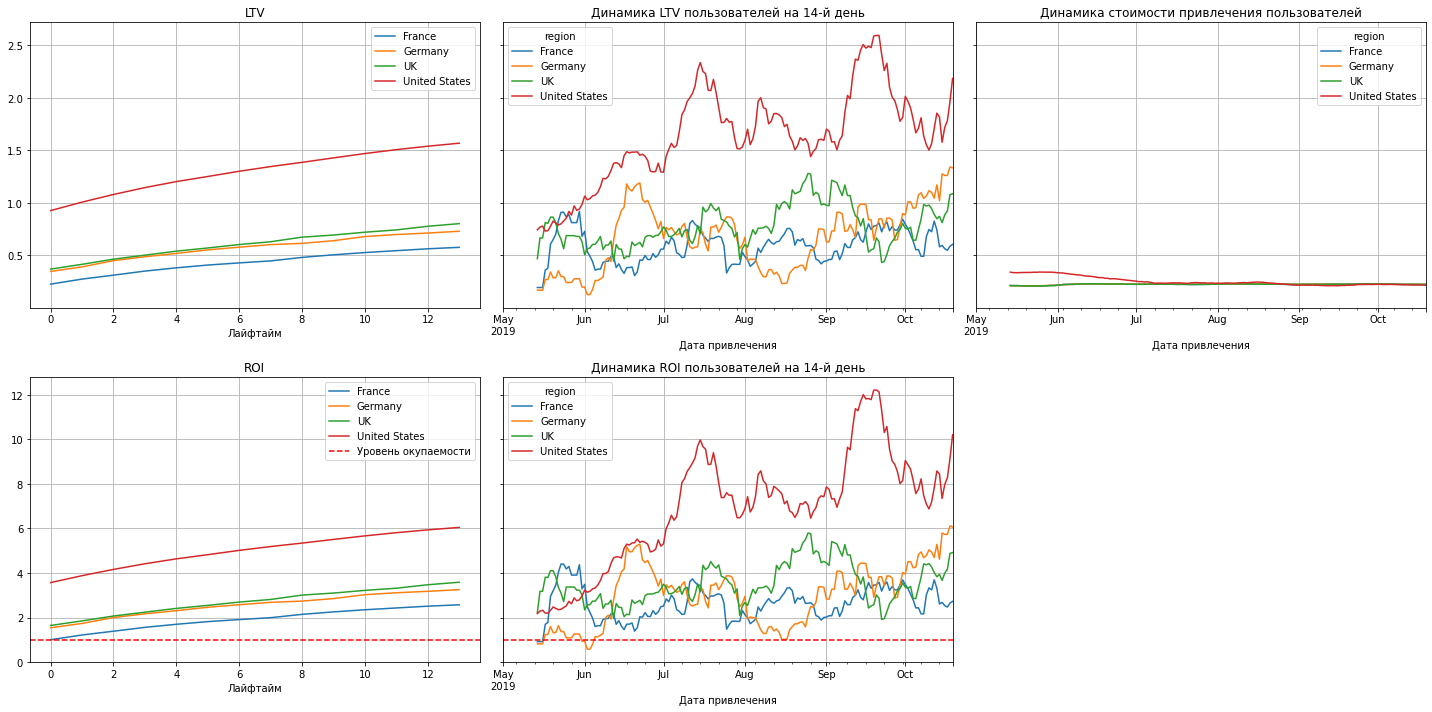

In [62]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

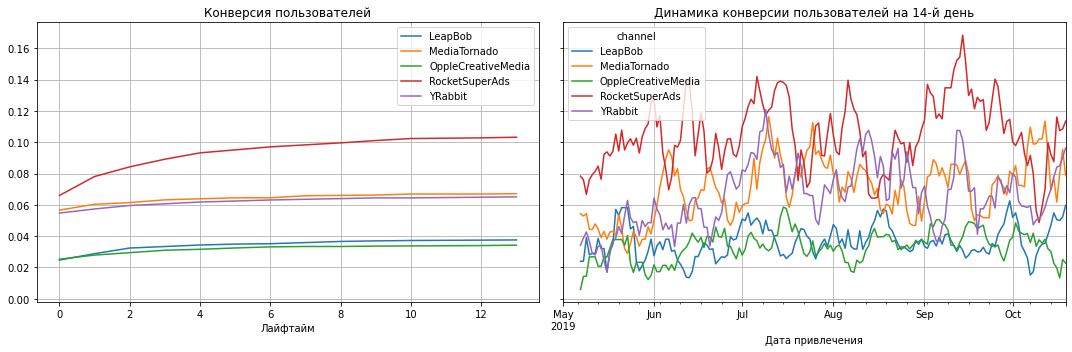

In [63]:
# смотрим конверсию с разбивкой по выбранным каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

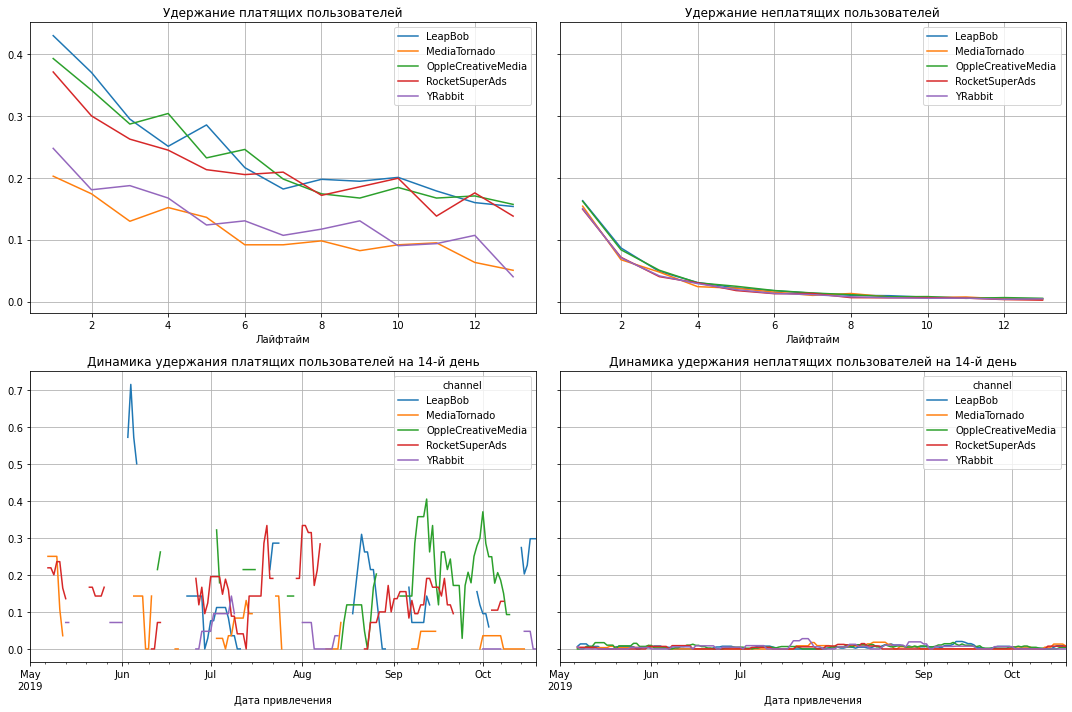

In [64]:
# смотрим удержание по выбранным каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

### Вывод по шагу 6


Решение рассмотреть отдельные каналы успешно. 

В данной выборке нет отрицательной динамики ни на одной платформе, и ни в одной стране. Реклама окупается, более того  есть тенденция к росту. 
Все 4 выбраных канала успешны. В целом можно отметить, что в удержание платящих пользователей выше для каналов, работающих в Европе. Но в целом каналов, действующих в одном регионе она не отличается.  
Удержание неплатящих пользователей одинаково для всех регионнов.

Стоимость самих покупок в Америке явно больше, чем в Еверопе. Клиенты там приносят больше прибыли компании. 
Так же можно сказать, что владельцы устройств Aple платят больше.

Для отдела маркетинга это прямая рекомендация обратить внимание на эти рекламные каналы для планирования инвестиций в рекламу.


## Общий вывод: 


**В целом рекламная компания не эффективная, а точнее убыточная. Основные факторы:**

   - Более 80% всех затрат приходятся на рекламные каналы:
    `TipTop` - 54751.30 у.е. это большая часть общего бюджета (~ 52%) 
    и `FaceBoom`- 32445.60 у.е. это более 30%. 
    
   Но как показывает анализ оба этих канала убыточны. Стоимость превлечения клиента  для канала `TipTop` сильно увеличивалась с каждым месяцем, а окупаемость инвестиций отрицательна. Т.е. фирма работала "в минус" и терпела убытки на протяжении почти всего рассматриваемого периода.

Судя по тому, что  фирма постоянно увеличивала инвестиции в эти рекламные каналы, принималось решение, что увеличение денег на рекламу увеличит прибыль. Но это было не так. В итоге убытки увеличивались.

И можно отметить, что удержание для `FaceBoom` и `AdNonSense` намного ниже очень быстро стремится к нулю. Видимо с этими каналами стоит отдельно поработать. Возможно другие каналы предлагают что то дополнительно (скидку, бонус или т.п.) что позволяет пользователям оставаться.

Не смотря на это, у канала `FaceBoom` самый большой процент платящих пользователей (12,2%) из всех рекламных каналов. Отделу маркетинга следует внимательно рассмотреть что к этому приводит.

- Органический трафик конвертируется в покупателей хуже всего, хотя количество привлеченных пользователей у него максимально. Отделу маркетинга на это стоит обратить пристальное внимание, почему люди пришедшие сами не совершают покупку?
Возможно по рекламным каналам происходит переход на какие то конкретные страницы, с которых проще совершить покупку? А люди, пришедшие по поиску не доходят до нужных страниц и уходят?



   - Что касается устройств, то реклама в целом окупается только на и PC. На Apple реклама убыточна. Следует внимательно оценить приложения для этой операционной системы. Возможно там есть ошибки, которые приводят к тому, что пользователи уходят или не покупают вообще. 
   
   Мы выяснили, что больше всего доля платящих пользователей у Mac. Самое большое количество зарегистрированных пользователей (платящих и не платящих) у iPhone. Поэтому факт того, что эти 2 ОС убыточны в рекламе требует самого пристального внимания отдела маркетинга.


   - Что касается территориального признака, то в USA был самый дорогой привлеченный клиент. И при этом его стоимость тоже резко увеличивалась со временем, но при этом он был убыточнен. Следует обратить внимание и на этот фактор. Возможно при регистрации в USA требуются дополнительные вложения, или стоимость участия намного выше, чем в других странах.
   
   
   

- При рассмотрении отдельно некоторых рекламных каналов, выявленные наиболее успешные для инвестиций. 
Дл разных регионов (Европа и Америка) это разные каналы.
для Еверопы это : `LeapBob` и `OppleCreativeMedia`. Для рынка Америки `YRabbit` и `MediaTornado`
Каналы выбраны как наиболее дешевые по стоимости привлечения.
У этих каналов нет отрицательной динамики ни на одной платформе, и ни в одной стране. Реклама окупается, более того  есть тенденция к росту. 
Для отдела маркетинга это прямая рекомендация обратить внимание на эти рекламные каналы для планирования инвестиций в рекламу.
